Lecture 17 - Cross Validation

Announcements
1. Problem set 9, quiz 9, and discussion board post 4 due end of this week
  - This is the last problem set, quiz, and discussion board post!
2. Problem set 7 grades posted soon
3. Remember to go to office hours and section for questions!

Topics
1. Problems with one train test split
2. Repeated train and test by hand
3. Other methods

When we split data into train and test, we are performing a cross-validation

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

We have mainly used a single train and test sample, which is called the holdout method. We will discuss some alternatives in this lecture

First, let's load our libaries like normal. We will also load the logistic regression library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

This time, let's use the same dataset as before on heart disease.

In [2]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data',index_col=0)

Let's check out the head

In [3]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


And let's focus on age and heart disease again

We can look at the boxplot, but its also sometimes helpful to look at the distributions themselves. In this case, let's use a kdeplot because its easier to see the overlap between the distributions

<AxesSubplot:ylabel='Density'>

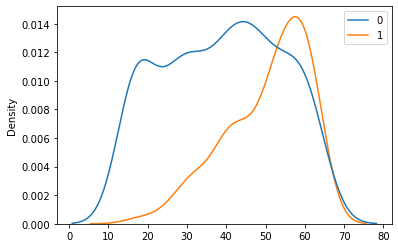

In [4]:
X = np.array(data['age']).reshape(data.shape[0],1) # age
y = np.array(data['chd']) # heart disease

#sns.boxplot(x=y,y=X[:,0])
sns.kdeplot(x=X[:,0],hue=y)

Now, let's do a logistic regression. But let's set the random state to be 33. As mentioned in the past, this random state sets the random seed to a specific value, which means every operation will follow the same sequence (thus, if you set your random state to the same as mine, we will get the same answer)

Let's do a random state of 33 though!

In [5]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=33)

model = LogisticRegression()
model = model.fit(Xtrain, ytrain)
print(model.score(Xtrain, ytrain))
print(model.score(Xtest, ytest))

0.6329479768786127
0.7672413793103449


That's a good testing score!

But random_state = 33 is so specific. Well, as it turns out, its because that testing state does the best out of the first 100. If you try random_state = 94 ......


In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=94)

model = LogisticRegression()
model = model.fit(Xtrain, ytrain)
print(model.score(Xtrain, ytrain))
print(model.score(Xtest, ytest))

0.7312138728323699
0.5258620689655172



That's like a .20 difference, which is massive!

There has got to be a better way, just in case you end up with a bad/good random_state. 

What is happening here? Let's look closer at the distributions

(0.0, 0.02)

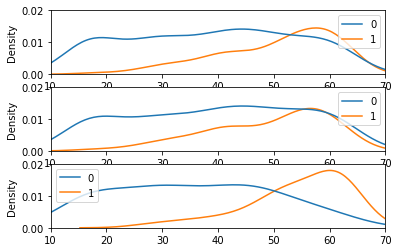

In [7]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=33)

plt.subplot(3,1,1)
sns.kdeplot(x=X[:,0],hue=y)
plt.xlim([10,70])
plt.ylim([0,.02])
plt.subplot(3,1,2)
sns.kdeplot(x=Xtrain[:,0],hue=ytrain)
plt.xlim([10,70])
plt.ylim([0,.02])
plt.subplot(3,1,3)
sns.kdeplot(x=Xtest[:,0],hue=ytest)
plt.xlim([10,70])
plt.ylim([0,.02])

When the seed is set to 94, the testing set has a lot of 0 cases far to the right. This is unlike our original data

When the seed is set to 33, the testing set has a lot of 1 cases far to the right. This is similar to our dataset, but probably exaggerates how far 1s are to the right

Either of these situations could be accurate, but just based on our data, it appears as if these are outliers.

*How I found the best testing score based on random_state, if you are curious*

33
94


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

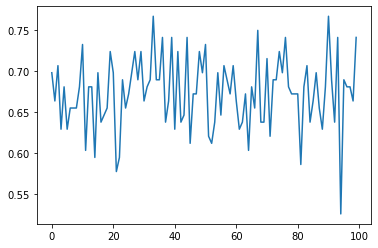

In [8]:
testing_score = []
i_pos = []
for i in range(0,100):
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=i)
  model = LogisticRegression()
  model = model.fit(Xtrain, ytrain)
  testing_score.append(model.score(Xtest, ytest))
  i_pos.append(i)

print(i_pos[testing_score.index(max(testing_score))])
print(i_pos[testing_score.index(min(testing_score))])

sns.lineplot(i_pos,testing_score)

This method is called the Holdout method of cross validation. Its actually not a bad method if you have a ton of data!

There are other methods that are more commonly used. Let's quickly talk about a few

1. Repeated train and test
2. kfolds
3. leave one out


In repeated train and test, we basically do the split and model fitting a bunch of times with a bunch of different random states

In [9]:
training_score = []
testing_score = []
for i in range(0,1000):
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=i)
  model = LogisticRegression()
  model = model.fit(Xtrain, ytrain)
  training_score.append(model.score(Xtrain, ytrain))
  testing_score.append(model.score(Xtest, ytest))

Then, we look at the distribution of scores

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.5, 0.8)

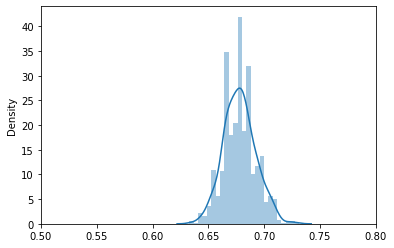

In [10]:
sns.distplot(training_score)
plt.xlim([.50,.8])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.5, 0.8)

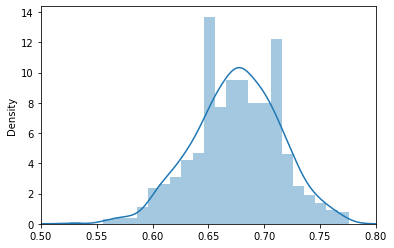

In [11]:
sns.distplot(testing_score)
plt.xlim([.50,.8])

You would report the average and standard deviation of the accuracy of this permuted distribution

In [12]:
np.mean(testing_score)

0.6752068965517242

In [13]:
np.std(testing_score)

0.03859434138163937

With repeated train and test, you can really see the effect of the split in proportion of your data

In [14]:
training_score = []
testing_score = []
for i in range(0,1000):
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=i,test_size =.5)
  model = LogisticRegression()
  model = model.fit(Xtrain, ytrain)
  training_score.append(model.score(Xtest, ytest))
  testing_score.append(model.score(Xtrain, ytrain))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.5, 0.8)

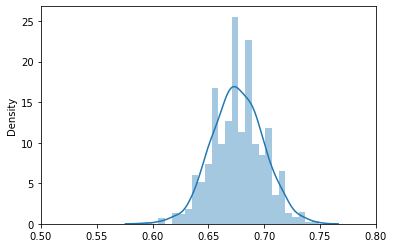

In [15]:
sns.distplot(training_score)
plt.xlim([.50,.8])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.5, 0.8)

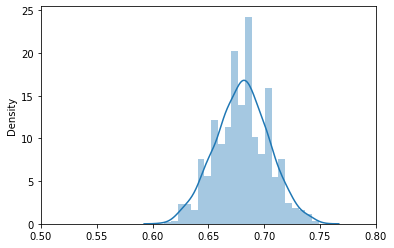

In [16]:
sns.distplot(testing_score)
plt.xlim([.50,.8])

When there is equal number of data in the training and testing, the resulting score distributions are pretty similar

In [17]:
np.mean(testing_score)

0.6803290043290043

In [18]:
np.std(testing_score)

0.023789706038088936

You can actually avoid all of that extra coding by doing the following:

In [19]:
from sklearn import model_selection

For each of these, we pass in our model, so we can define that ahead of time without having to redefine it

In [20]:
model = LogisticRegression() 

In [21]:
shufflesplit = model_selection.ShuffleSplit(n_splits=10, random_state=0)

And we will evaluate these 'folds' using cross_val_score. Here, the accuracy of each random split is saved in an array

In [22]:
results = model_selection.cross_val_score(model, X, y, cv=shufflesplit)
print(results)

[0.76595745 0.61702128 0.59574468 0.44680851 0.57446809 0.65957447
 0.65957447 0.72340426 0.68085106 0.68085106]


And then, we can check the mean and std of that array

In [23]:
print(results.mean(), results.std())

0.6404255319148936 0.08427788221420579


One limitation of repeated train and test is that... well... it is random!

Ideally, one would do every permutation (which is basically like one of the methods below), but its possible that you end up with some data being in the training or the testing set more often

This isn't the only method to split your data

Another method is to develop KFOLDS

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

Each split of the data is called a fold. The algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.

In [24]:
kfold = model_selection.KFold(n_splits=10) # don't need to a random_state here because there is no shuffling
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results)
print(results.mean(), results.std())

[0.70212766 0.72340426 0.73913043 0.65217391 0.47826087 0.60869565
 0.7826087  0.67391304 0.67391304 0.7173913 ]
0.6751618871415357 0.08012111561990784


K-folds is pretty much the gold standard with most people using 3, 5, or 10 folds.

One of the really nice properties of k-folds is that each data is in the testing set exactly once.

Another method is leave-p out, where p = the number to leave out

A common method is to use leave-1 out (i.e., p = 1) which is the same as KFold(n_splits=n)

Unlike KFold, this is exhaustive. Meaning that it will run all possible combinations of train/test split on the data

The other methods we discussed are non-exhaustive

In [25]:
loocv = model_selection.LeavePOut(p=1)
results = model_selection.cross_val_score(model, X, y, cv=loocv)
print(results)
print(results.mean(), results.std())

[0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.

If we use cross_validate instead of cross_val_score, we actually can extract a few more details from our cross_validation

In [26]:
kfold = model_selection.KFold(n_splits=10) # don't need to a random_state here because there is no shuffling
model = LogisticRegression()
results = model_selection.cross_validate(model, X, y, cv=kfold)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


And here, we can print our test scores, which should be the same as what we found above

In [27]:
results['test_score']

array([0.70212766, 0.72340426, 0.73913043, 0.65217391, 0.47826087,
       0.60869565, 0.7826087 , 0.67391304, 0.67391304, 0.7173913 ])

We can also turn on training scores and have multiple scoring options

In [28]:
results = model_selection.cross_validate(model, X, y, cv=kfold,return_train_score=True,scoring=('f1','accuracy'))
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_f1', 'train_f1', 'test_accuracy', 'train_accuracy'])


Neat!

In [29]:
results['test_f1']

array([0.61111111, 0.31578947, 0.57142857, 0.42857143, 0.25      ,
       0.47058824, 0.58333333, 0.48275862, 0.57142857, 0.23529412])

And lastly, you can get predicted values from cross_val_predict, which is pretty similar 

In [30]:
y_pred = model_selection.cross_val_predict(model, X, y, cv=kfold)

In [31]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Note that cross_val_predict while only work when the data is partitioned such that an item is only ever tested once. So, for shufflesplit, it will not work because that may not be true 

In [32]:
from sklearn.linear_model import LinearRegression

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

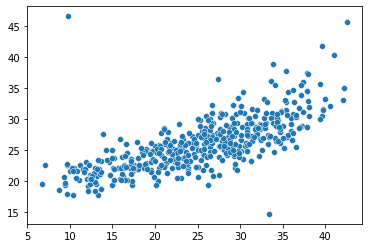

In [33]:
X = np.array(data['adiposity']).reshape(len(X),1) # age
y = np.array(data['obesity']) # heart disease

sns.scatterplot(X[:,0],y)

In [34]:
kfold = model_selection.KFold(n_splits=10) # don't need to a random_state here because there is no shuffling
model = LinearRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='r2')
print(results)
print(results.mean(), results.std())

[0.06081123 0.62139114 0.57591156 0.64596558 0.61837066 0.49953188
 0.59195156 0.37574216 0.55627963 0.46372646]
0.5009681854034886 0.16645474754542403


You can find the scoring parameter options here, which is important when considering different models and you goals!

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

The last thing to ponder is the addition of breaking up the training set into training and validation, which is another option. This is something you can read more about below (open using incognito mode)

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


https://scikit-learn.org/stable/modules/cross_validation.html

https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/


In summary:

holdout approach (i.e., 1 train and test split) is not good if you have small-medium amounts of data, but okay if you have a lot of data

repeated train test is better, but this isn't perfect because some data may never be in the testing set while other data may appear in the testing set a bunch. I just like it because I like distributions!

Kfold being the most popular = kfold of 3, 5 or 10

Leave1Out is common as well, but could take a lot of time to run if you have lots of data